<a href="https://www.kaggle.com/code/kasaligabriel/animal-classification-with-tensorflow?scriptVersionId=90512875" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing important packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-03-19 02:54:57--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.128, 173.194.213.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   247MB/s    in 0.3s    

2022-03-19 02:54:58 (247 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [3]:
from keras.layers import Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.inception_v3 import InceptionV3
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [4]:
# Assigning the local weights that was downloaded
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [5]:
import os

data_dir = '../input/animal-image-dataset-90-different-animals/animals/animals'

Name = os.listdir(data_dir)
print(Name)
print(len(Name))

N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']
90


In [6]:
preprocess_input = tf.keras.applications.resnet.preprocess_input

batch_size=64

# Rescaling the input image as well as Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
        validation_split=0.2,
        rotation_range=30,
        width_shift_range=0.2,
        preprocessing_function=preprocess_input,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)

data_dir = "../input/animal-image-dataset-90-different-animals/animals/animals"

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='categorical',
  batch_size=120,subset = "training")

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='categorical',
  batch_size=120,subset = "validation")


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


In [7]:
# Using the google Inception pretrained model for transfer learning
pre_trained_model = InceptionV3(input_shape = (255, 255, 3), 
                                include_top = False, 
                                weights = None)

# Loading the pre-trained weights that was downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

2022-03-19 02:54:59.335190: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 02:54:59.452151: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 02:54:59.452882: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 02:54:59.454400: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
# printing out the summary of the pretrained model
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 255, 255, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [9]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [10]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)
# Flattening the model to 1 dimension
x = layers.Flatten()(x)

# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 255, 255, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# compiling the model
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate=0.001), 
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy'])

In [12]:
# defining the callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after training loss becomes less than 0.15

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.15):

      # Stop if threshold is met
      print("\nLoss is lower than 0.15 so cancelling training!")
      self.model.stop_training = True
    
# Instantiate class
callbacks = myCallback()

In [14]:
# Fitting the model
history = model.fit( train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 36,
            epochs = 10,
            callbacks = [callbacks])

Epoch 1/10
36/36 [==============================] - 153s 4s/step - loss: 3.2698 - accuracy: 0.9894 - val_loss: 1.6924 - val_accuracy: 0.9917
Epoch 2/10
36/36 [==============================] - 123s 3s/step - loss: 1.4672 - accuracy: 0.9925 - val_loss: 0.9071 - val_accuracy: 0.9946
Epoch 3/10
36/36 [==============================] - 122s 3s/step - loss: 1.0922 - accuracy: 0.9940 - val_loss: 0.8008 - val_accuracy: 0.9952
Epoch 4/10
36/36 [==============================] - 122s 3s/step - loss: 0.9102 - accuracy: 0.9948 - val_loss: 0.6637 - val_accuracy: 0.9959
Epoch 5/10
36/36 [==============================] - 123s 3s/step - loss: 0.7972 - accuracy: 0.9953 - val_loss: 0.6344 - val_accuracy: 0.9964
Epoch 6/10
36/36 [==============================] - 123s 3s/step - loss: 0.7133 - accuracy: 0.9956 - val_loss: 0.6200 - val_accuracy: 0.9963
Epoch 7/10
36/36 [==============================] - 123s 3s/step - loss: 0.6279 - accuracy: 0.9961 - val_loss: 0.5927 - val_accuracy: 0.9964
Epoch 8/10
36

In [17]:
# Saving the model.
model.save("AnimalClassification.h5")

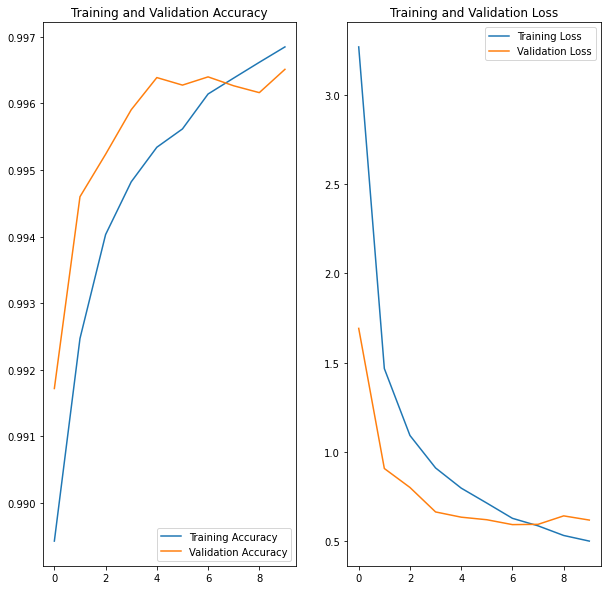

In [18]:
# Model Evaluation by comparing the training and validation accuracy as well as the loss.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Both the Training and Validation accuracy are properly alligned which shows that overfitting of the data was avoided. The training and the validation accuracy both exceeds over **99.6%**(very high prediction accuaracy) which is a good sign that the model is good to use for prediction.
The training and validation loss have a very little deviation from each other and are both decreasing with each training.The losses are both below **0.6** at the final epoch.